#  Simulating morphological surface layer degaradation and its effects over metrological parameters using a model based on normals estimation

## Introduction
The degradatin of metals is due to complex pheomena linked with gasses or solids that interacts with the surface of the metal. In the case of interaction of gasses with the metal surface is often produced a layer on the top of the metal surface. 
This layer is usally due to the interaction of the metal with the oxygen but other gasses may interact with the metal producing an alteration layer (e.g. hydrogen suphide and silver). 
The caracheristic of the layer depends on the type of compound that is formed. The cristal structure of the compound affects the stability of the layer: alluminum forms with oxygen a layer of allumina which passivate the metal. In this paper we describe a possible way to simulate the formation of this layer and its effect on metrological parameters such as roughness. 

##Description of the surface
The surface morphology can be described as a two dimensional vector of heighs or as a three dimensional vector where in one dimension are stored the heights and in the other two dimensions the coordinates. As well a generic profile of a surface can be described as a single vector of heights or as a twodimensional vector where one dimension is used for storing the heights and the other for storing the spatial coordinates. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

## Normals 
There are different techniques to calculate normals of a surface. 

(0, 7)

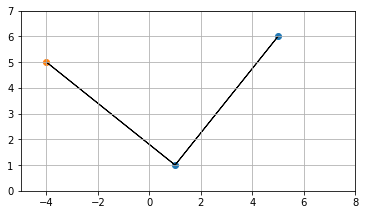

In [2]:
figex = plt.figure()

axex = figex.add_subplot(111)
axex.grid()
axex.scatter([1,5],[1,6])
axex.scatter([-4],[5])
axex.arrow(1,1,4,5)
axex.arrow(1,1,1-(5+1),1+(4-1))
axex.set_aspect('equal')
axex.set_xlim(-5,8)
axex.set_ylim(0,7)



This way of finding the normal is however inprecise because it is based only on the next point for caclulating, we can however calculate the normal to the line traced by these two points. 


(0, 7)

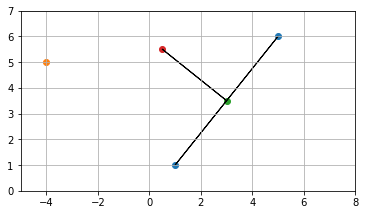

In [3]:
figex = plt.figure()
x12 = [1,5]
y12 = [1,6]
axex = figex.add_subplot(111)
axex.grid()
axex.scatter(x12,y12)
axex.scatter([-(x12[1]-x12[0])],[y12[1]-y12[0]])

mid_pt = [np.average(x12), np.average(y12)]
axex.scatter(mid_pt[0],mid_pt[1])
axex.scatter([mid_pt[0]-(y12[1]-mid_pt[1])],[mid_pt[1]+x12[1]-mid_pt[0]])
axex.arrow(1,1,4,5)
axex.arrow(mid_pt[0],mid_pt[1],-(y12[1]-mid_pt[1]),x12[1]-mid_pt[0])
axex.set_aspect('equal')
axex.set_xlim(-5,8)
axex.set_ylim(0,7)

6


(-6, 13)

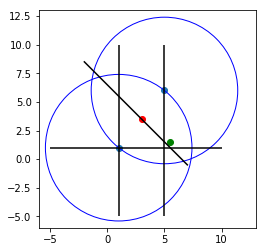

In [4]:
x,y = [1,5],[1,6]
figex = plt.figure()
axex = figex.add_subplot(111)
axex.scatter(x,y)
dist = np.sqrt((x[1]-x[0])**2 + (y[1]-y[0])**2)
circle1 = plt.Circle((x[0], y[0]), dist, color='b', fill=False)
circle2 = plt.Circle((x[1], y[1]), dist, color='b', fill=False)
axex.add_artist(circle1)
axex.add_artist(circle2)
axex.set_aspect('equal')
axex.vlines(5,-5,10)
axex.vlines(1,-5,10)
axex.hlines(1,-5,10)
mx,my = [x[0]+(x[1]-x[0])/2., y[0]+(y[1]-y[0])/2.]
axex.scatter(mx,my,color='r')
print (y[1]-y[0])+x[0]
p3 = [1-mx, 1-my]
axex.scatter(-p3[1]+mx,p3[0]+my,color='g')
#(-dy, dx) and (dy, -dx).
axex.plot([mx-(y[1]-y[0]),mx+(x[1]-x[0])],[my+(y[1]-y[0]),my-(x[1]-x[0])],color = 'k')
axex.set_xlim(-6,13)
axex.set_ylim(-6,13)

In [5]:
heights = np.empty(10)
heights.fill(7)
print heights

[ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]


In [6]:

heights = np.linspace(3,10,20)
coordinates = np.arange(heights.size)
print coordinates

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


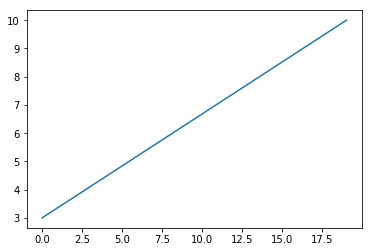

In [7]:
profile = np.array([coordinates,heights])
plt.plot(profile[0],profile[1])
plt.show()

In [8]:
ynormals = np.gradient(heights,1)
print ynormals

[ 0.36842105  0.36842105  0.36842105  0.36842105  0.36842105  0.36842105
  0.36842105  0.36842105  0.36842105  0.36842105  0.36842105  0.36842105
  0.36842105  0.36842105  0.36842105  0.36842105  0.36842105  0.36842105
  0.36842105  0.36842105]


In [9]:
xnormals = 1-ynormals
print xnormals
normals  = zip(xnormals,ynormals)


[ 0.63157895  0.63157895  0.63157895  0.63157895  0.63157895  0.63157895
  0.63157895  0.63157895  0.63157895  0.63157895  0.63157895  0.63157895
  0.63157895  0.63157895  0.63157895  0.63157895  0.63157895  0.63157895
  0.63157895  0.63157895]


In [10]:
def plot_normals(profile2D,normals):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(profile2D[0],profile2D[1])
    for idx,norm in enumerate(normals):
        x,y = profile2D[0][idx], profile2D[1][idx]
        ax.arrow(x,
                 y,
                 -norm[1], # this is the legnth of the arrow along x
                 norm[0], # this is the legnth of the arrow along y
                 head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.set_ylim(None,max(profile2D[1].flatten())+2)
    ax.set_aspect('equal')
    plt.show()
    

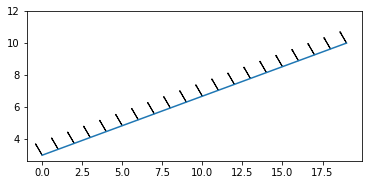

In [11]:
plot_normals(profile,normals)

Now we can incapsulate the function in an algortihm to caluclate the normals of a generic 2D profile.

In [12]:
def normals_2d(profile2d,plot=True):
    ynormals = np.gradient(profile2d[1])
    xnormals = 1-ynormals
    normals  = zip(xnormals,ynormals)
    if plot:
        plot_normals(profile2d,normals)
    return normals
    
    

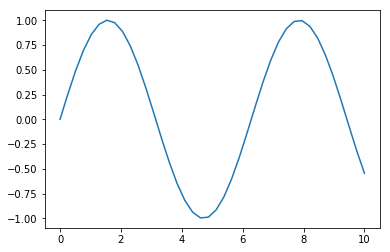

In [13]:
irregular_profile =  np.array([np.random.randint(0,10,) for i in range(30)])
sin_profile = np.array([np.sin(i) for i in np.linspace(0,10,40)])
profile2 = np.array([np.linspace(0,10,40),sin_profile])  
plt.plot(np.linspace(0,10,40),sin_profile)

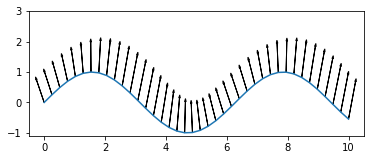

In [14]:
normals = normals_2d(profile2)

# Using difference method

Normals can be also defined as follow 

In [15]:
def plot_normals_diff(profile2D,normals):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(profile2D[0],profile2D[1])
    for idx,norm in enumerate(normals):
        x,y = profile2D[0][idx], profile2D[1][idx]
        ax.arrow(x,
                 y,
                 -norm[1],
                 norm[0], 
                 head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.set_ylim(None,max(profile2D[1].flatten())+2)
    plt.show()